## Résumé de la fiche de code

Modélisation d'un mouvement migratoire sur des pays et des individus (migrants) fictifs à l'aide des critères suivants:

##### Niveau  de vie pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)
##### Stabilité politique du pays (modélisé par un flottant variant entre 0 et 1, 1 est non inclu)

Les critères sont les différents facteurs qui peuvent pousser à la migration.
Chaque individus a un poids/préférence pour chaque critère qui est modélisé par un flottant variant entre 0 et 1, 1 est non inclu.

In [1]:
import random
random.seed(0)
import numpy as np
import matplotlib.pyplot as plt

%run -i '/users/nfs/Etu6/21116206/Documents/Are_Dynamic/fonctions.py'

In [11]:
# Les individus (migrants) de caractéristiques: id, poids du critère 'niveau de vie', 
# poids du critère 'situation politique', pays choisi.

individus = np.array([np.array([i, random.random(), random.random(), -1]) for i in range(50)])

In [13]:
# Les pays de caractéristiques: id, note pour le critère 'niveau de vie', 
# note pour le critère 'situation politique', 'nombre de personne pouvant 
# etre accueillies par année', 'historique de valeurs'.

pays = np.array([np.array([i, random.random(), random.random(), 20, []]) for i in range(5)])

/users/nfs/Etu6/21116206/Documents/Are_Dynamic/fonctions.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


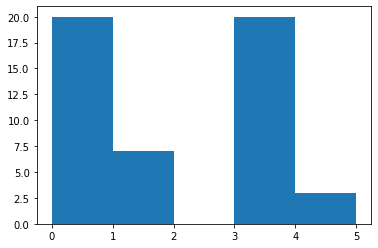

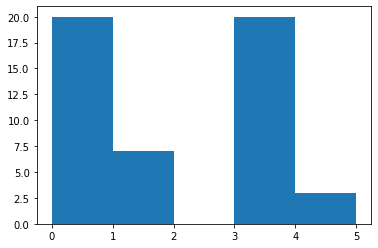

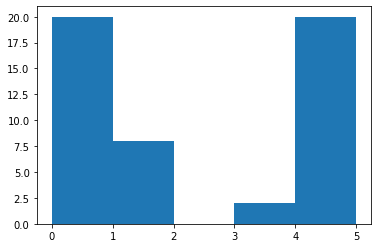

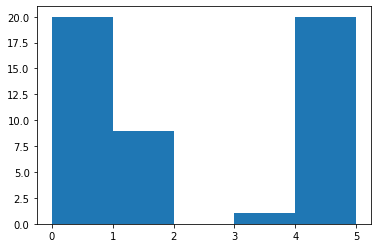

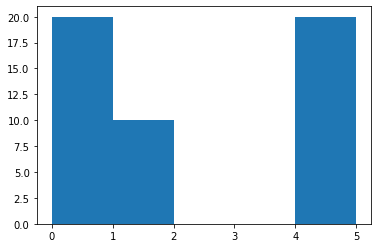

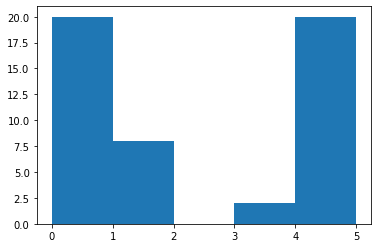

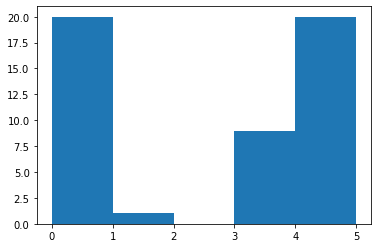

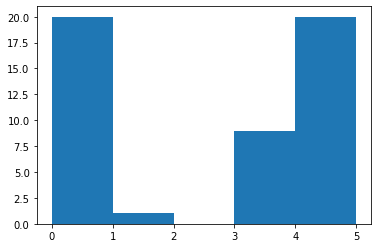

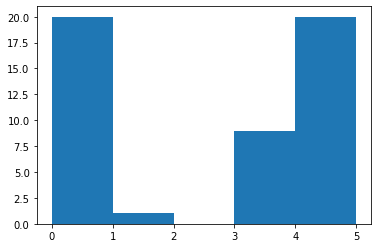

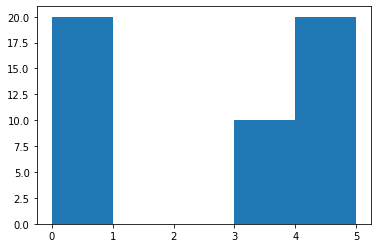

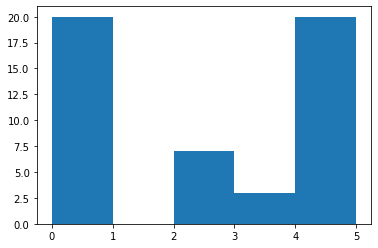

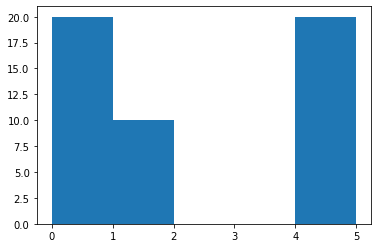

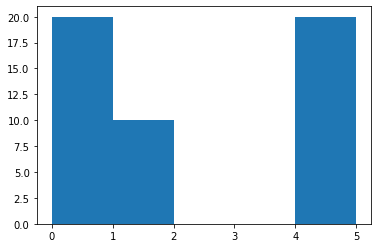

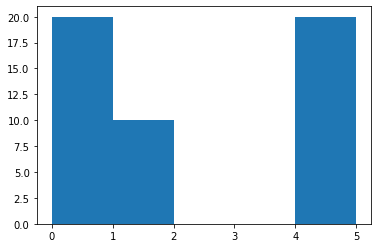

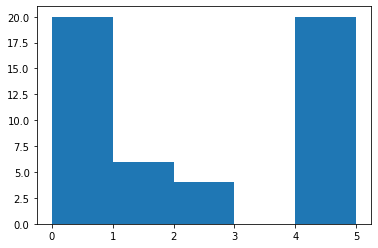

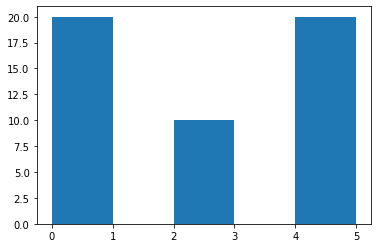

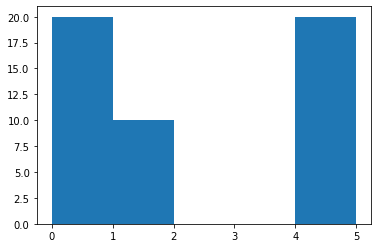

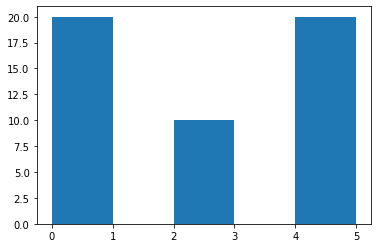

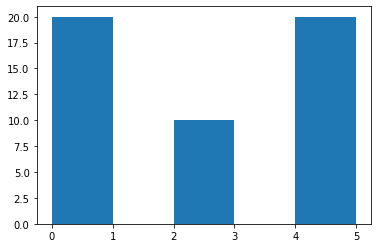

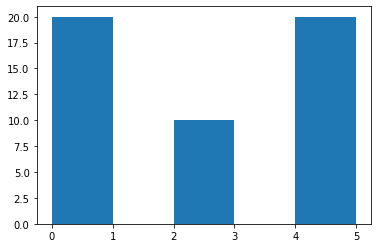

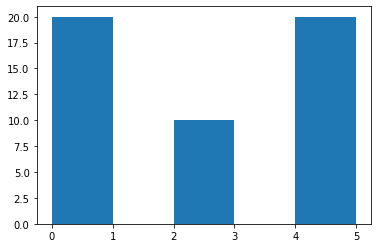

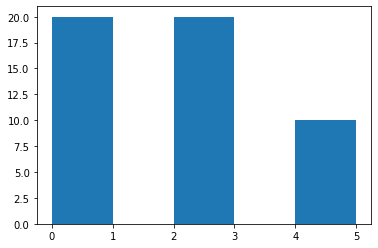

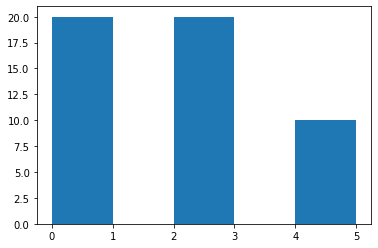

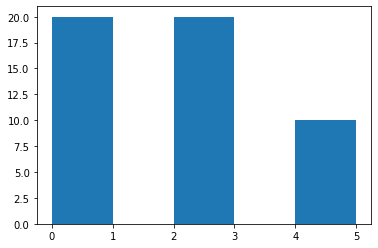

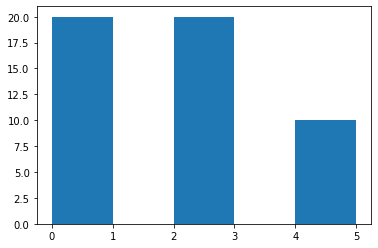

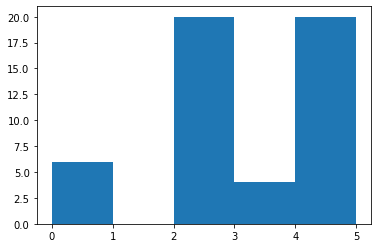

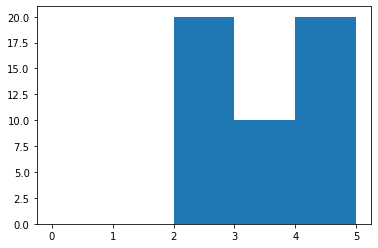

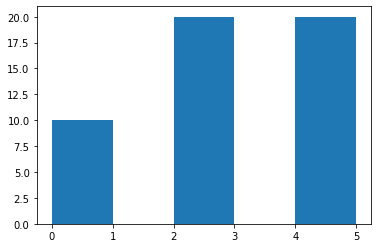

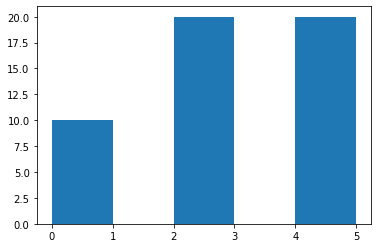

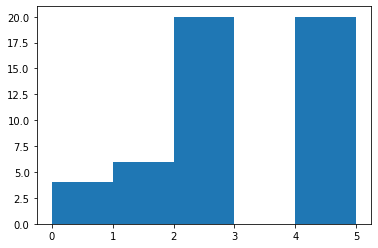

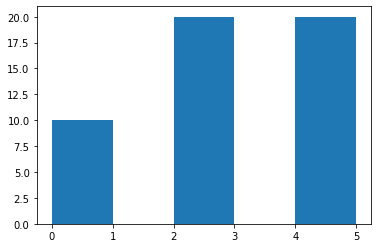

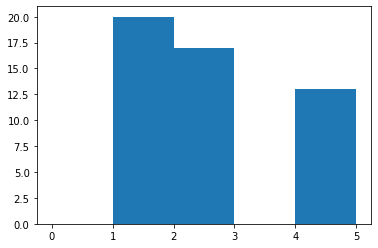

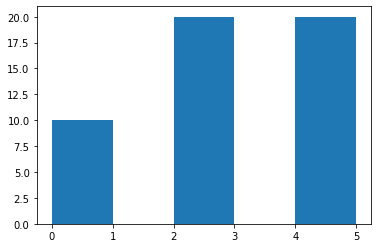

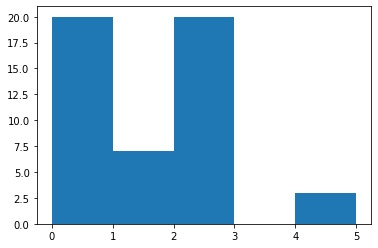

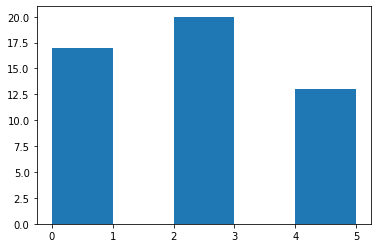

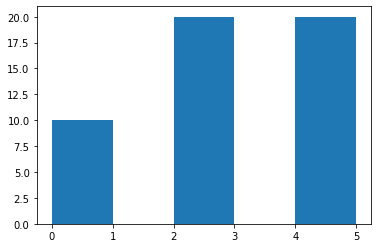

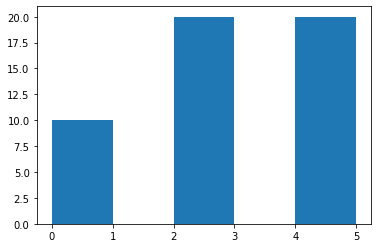

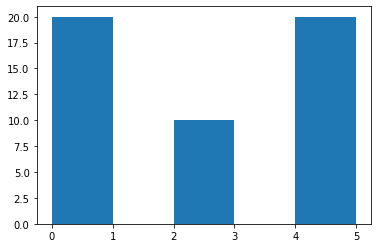

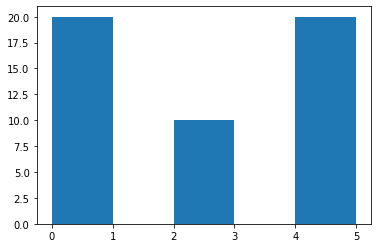

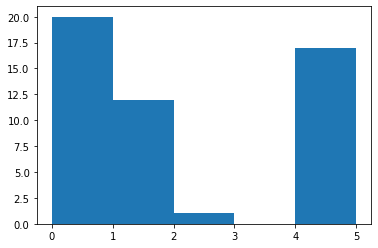

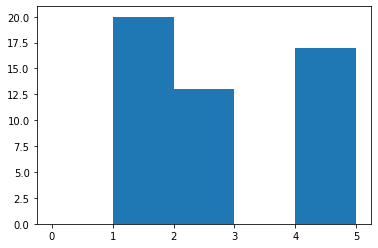

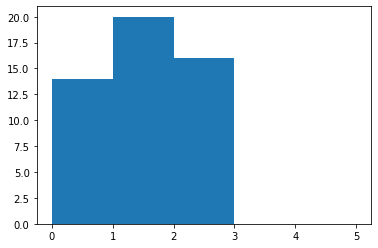

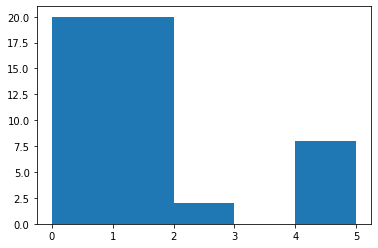

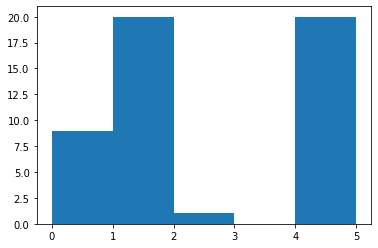

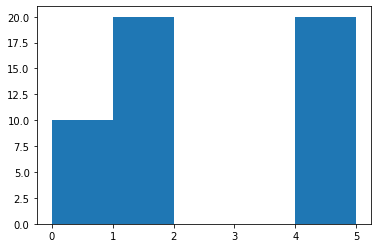

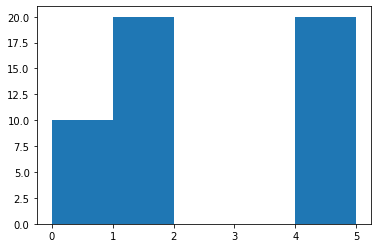

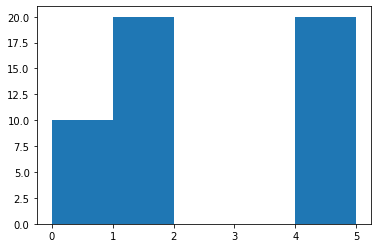

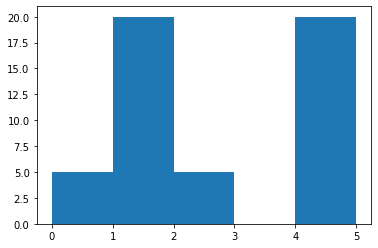

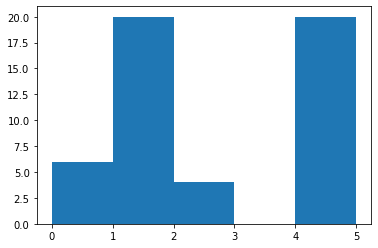

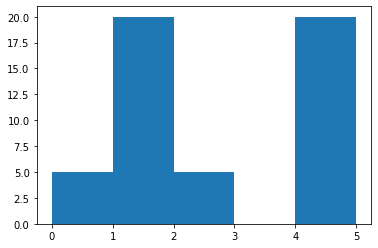

In [4]:
annees = 50;
migration(pays, individus, annees)

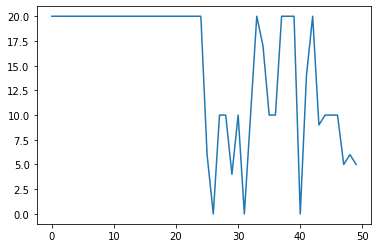

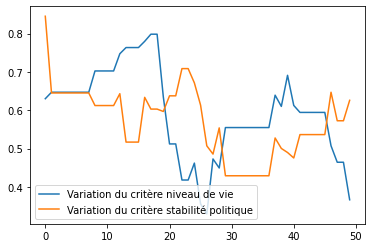

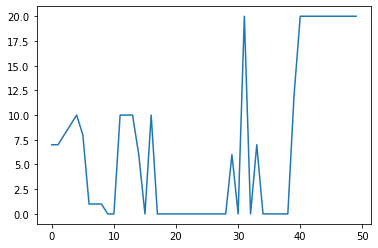

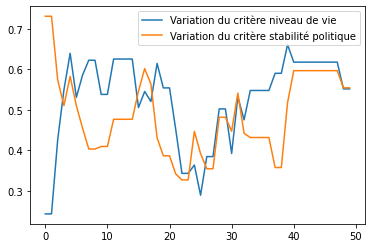

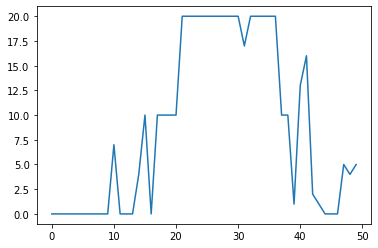

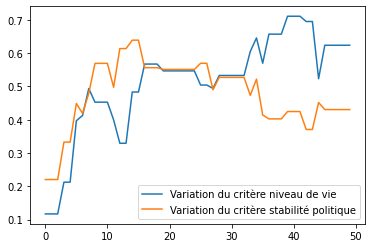

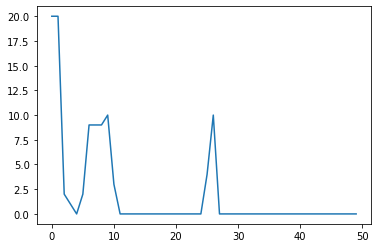

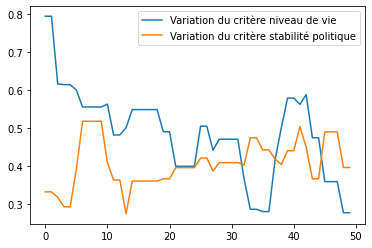

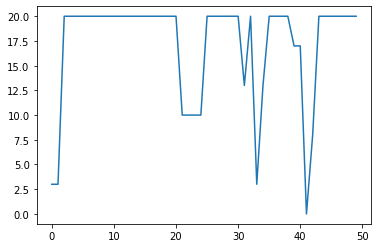

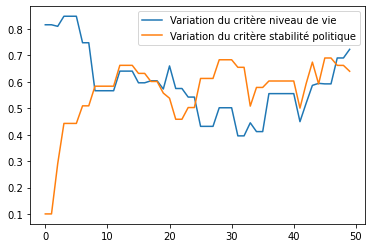

In [5]:
for j in range(len(pays)):
    plt.figure()
    plt.plot([i for i in range(annees)], [pays[j][4][i][0] for i in range(len(pays[j][4]))], label = "Nbre de migrants accueillies par année")
    plt.show()
    plt.figure()
    plt.plot([i for i in range(annees)], [pays[j][4][i][1] for i in range(len(pays[j][4]))], label = "Variation du critère niveau de vie")
    plt.plot([i for i in range(annees)], [pays[j][4][i][2] for i in range(len(pays[j][4]))], label = "Variation du critère stabilité politique")
    plt.legend()
    plt.show()